In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pd.pandas.set_option('display.max_colums', None)

In [ ]:
dataset = pd.read_csv('HousePriceTrain.csv')
print(dataset)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
features_with_na = [ features for features in dataset.columns if dataset[features].isnull().sum()>1]
# will get all feature name wihc hold at least one nan

print(features_with_na)
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),' % missing values')

    

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.5973  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


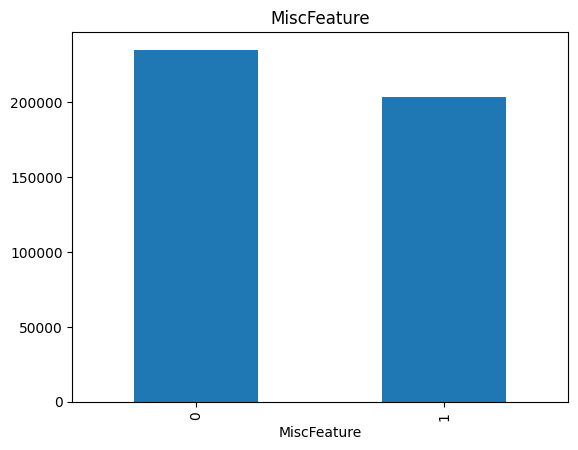

In [ ]:
for feature in features_with_na:
    data = dataset.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    # plt.show()


In [ ]:
print("Id of houses{}".format(len(dataset.Id)))

Id of houses1460


In [ ]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
print('Number of numerical variables: ', len(numerical_features))
dataset[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
for feature in year_feature:
    print(feature, dataset[feature].unique())
    

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

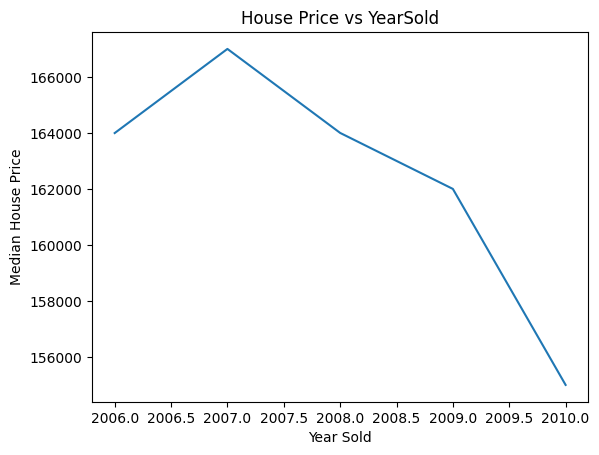

In [ ]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs YearSold')

In [ ]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

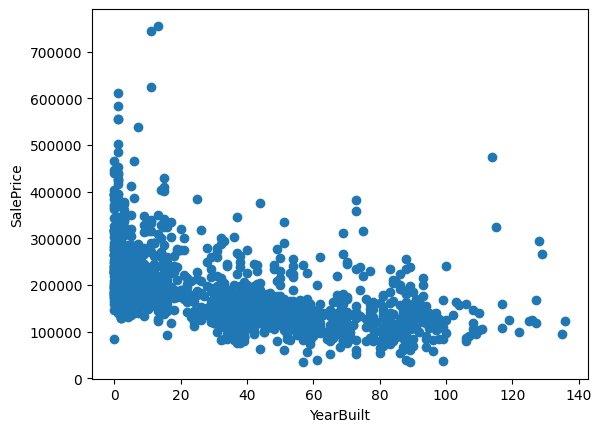

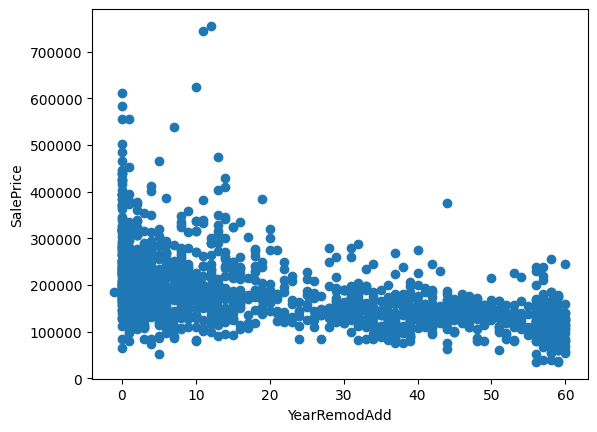

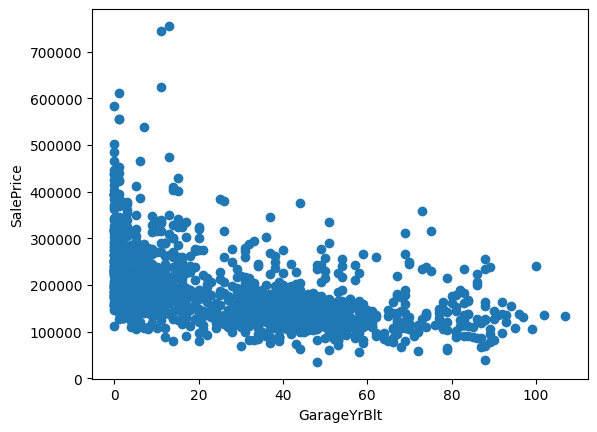

In [ ]:
for feature in year_feature:
    if feature != 'YrSold':
        data = dataset.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [ ]:
discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique())< 25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}", format(len(discrete_feature)))


Discrete Variables Count: {} 17


In [ ]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [ ]:
dataset[discrete_feature]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


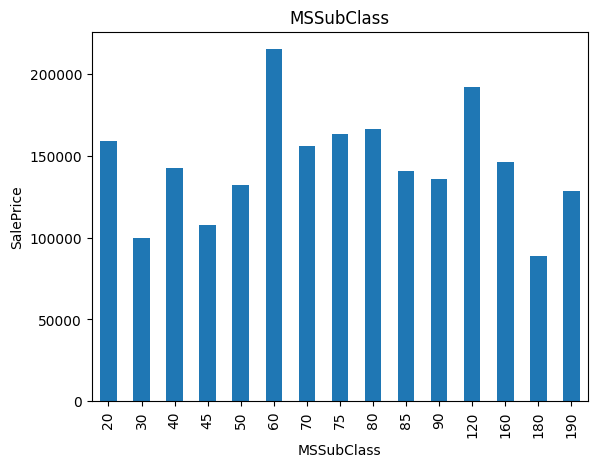

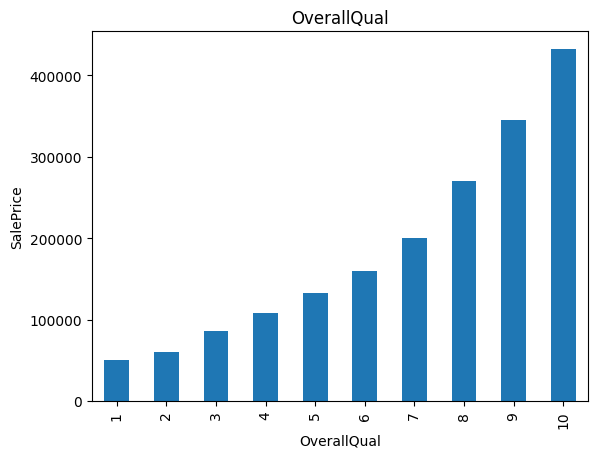

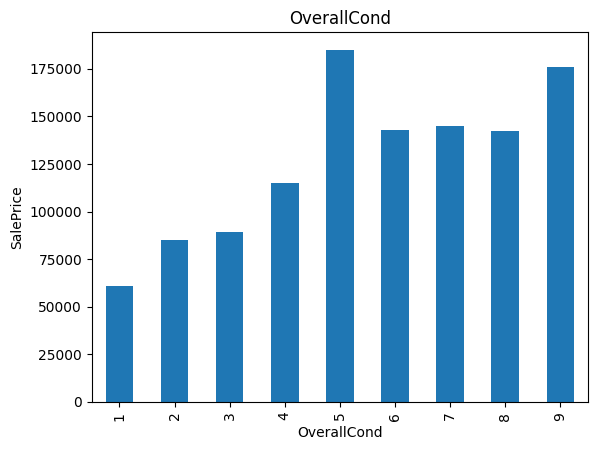

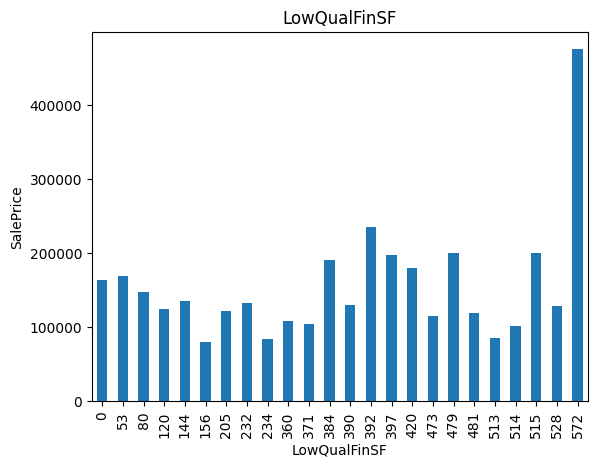

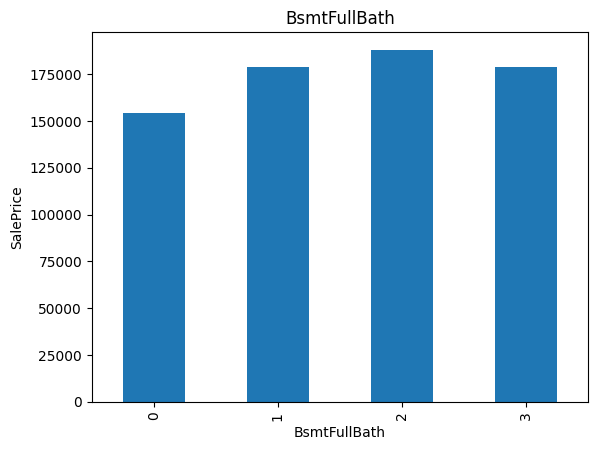

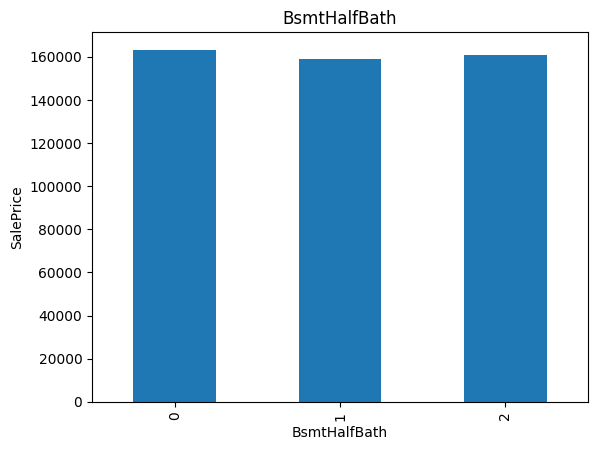

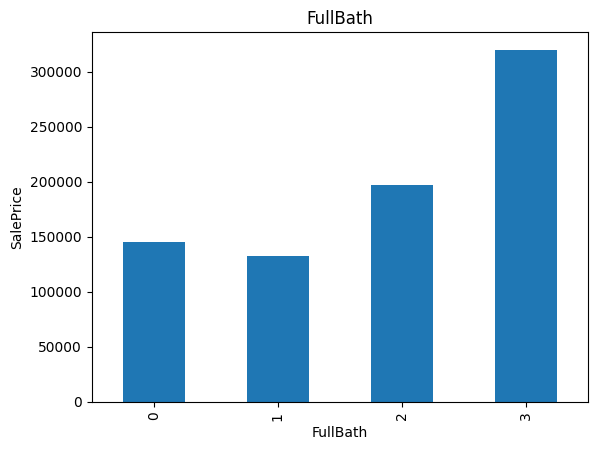

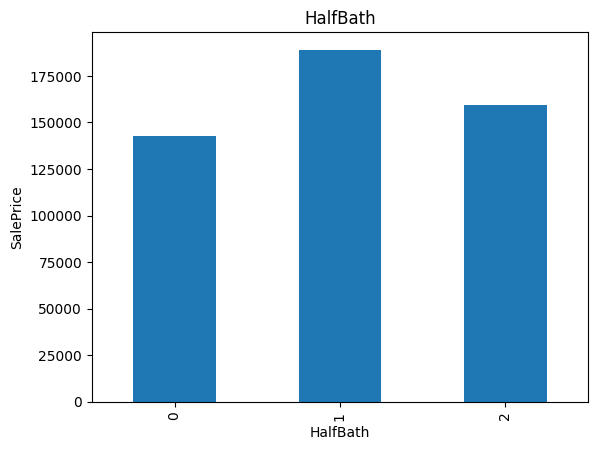

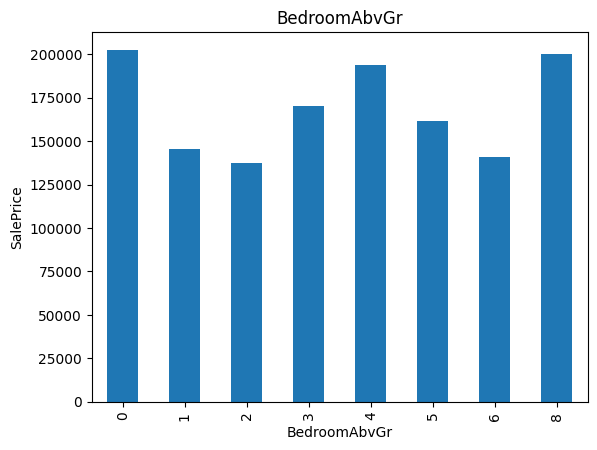

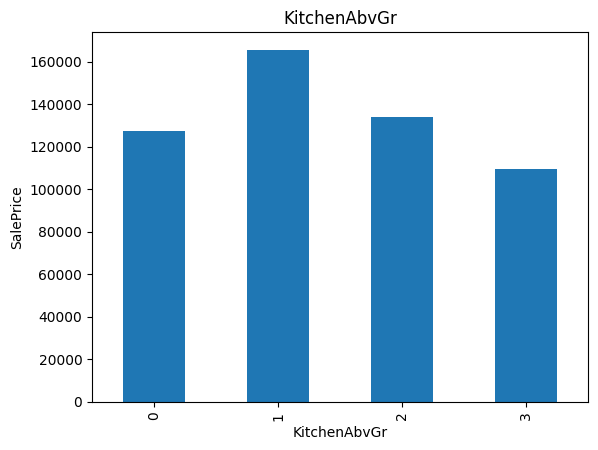

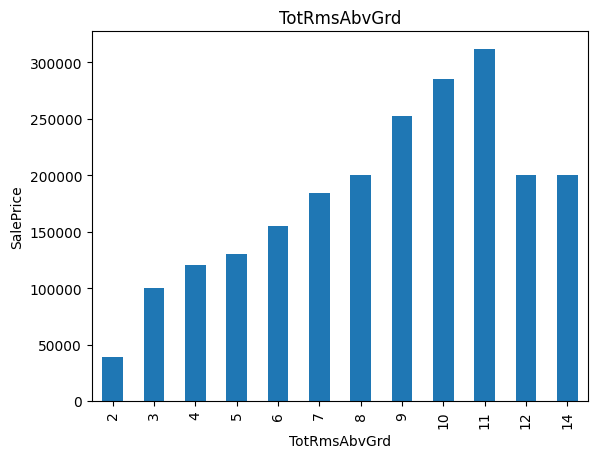

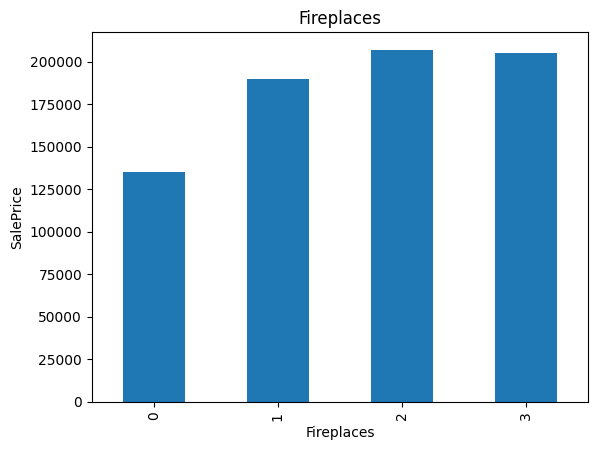

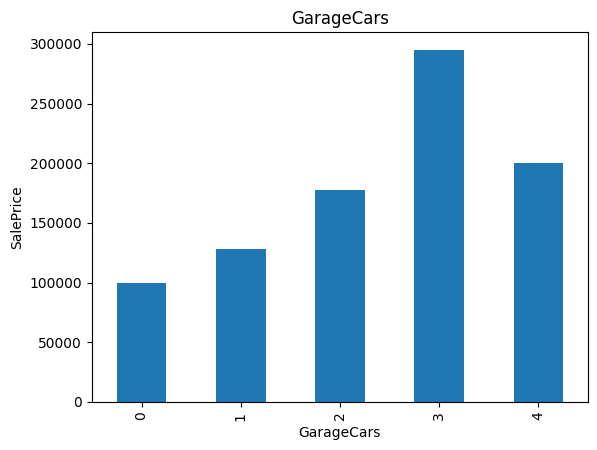

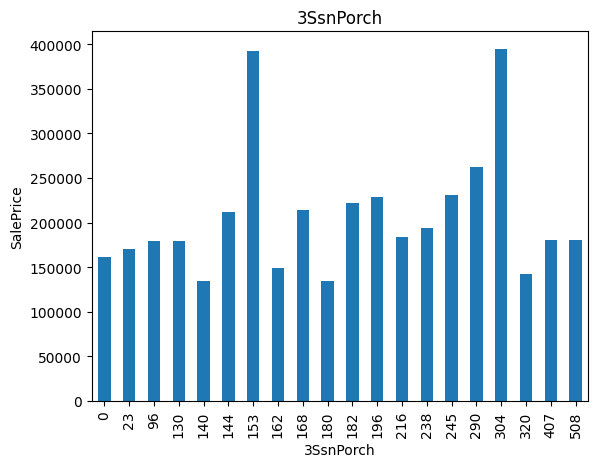

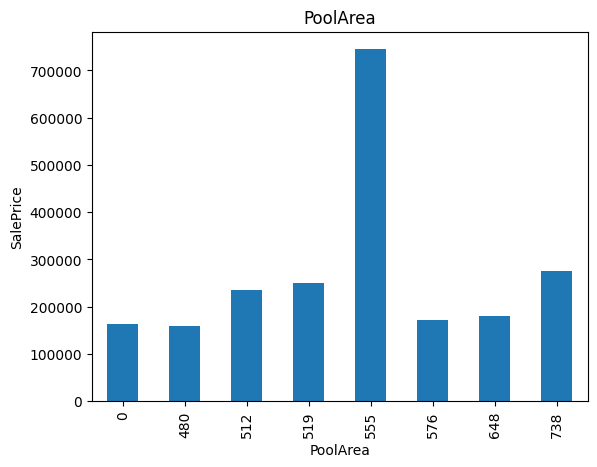

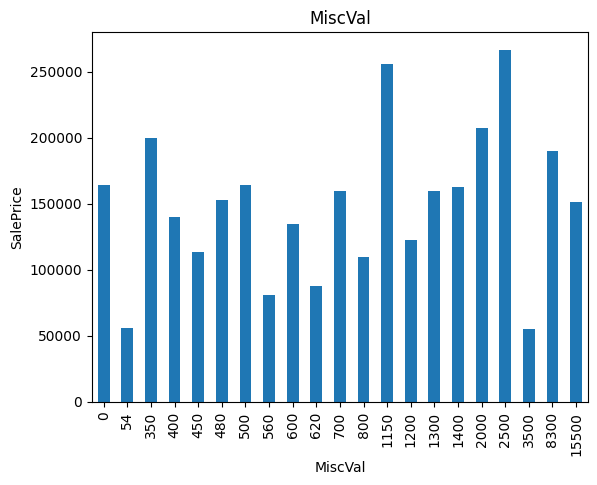

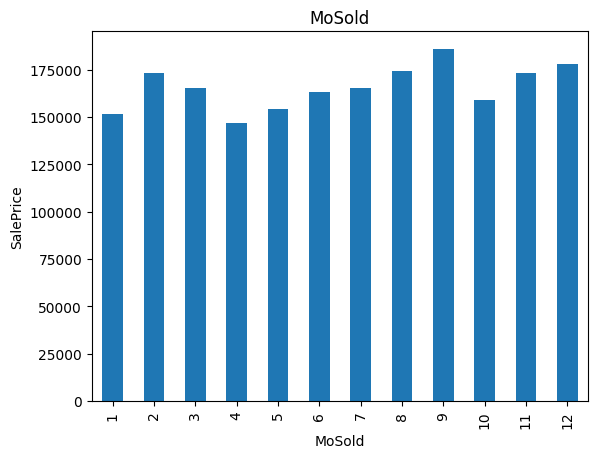

In [ ]:
for feature in discrete_feature:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()





In [ ]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print( "continous feature count {}",format(len(continuous_feature)))


continous feature count {} 16


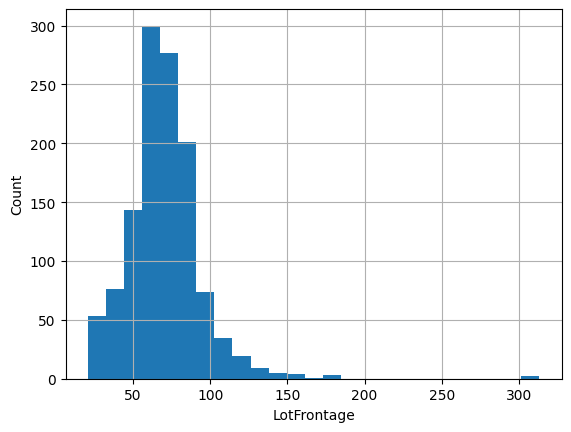

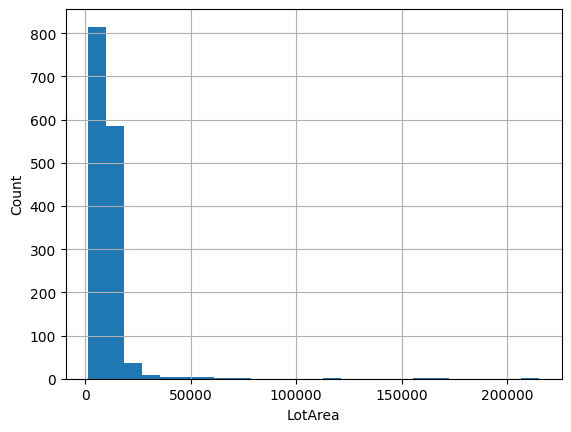

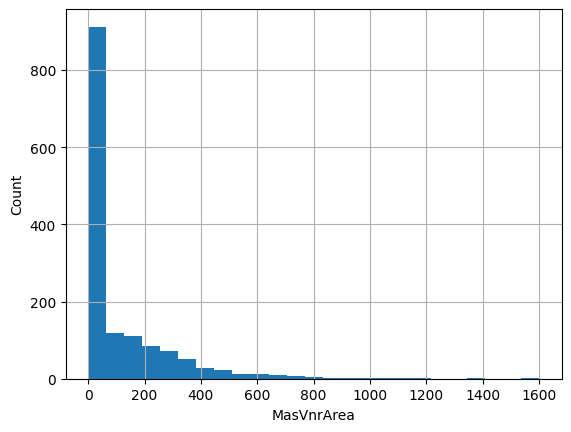

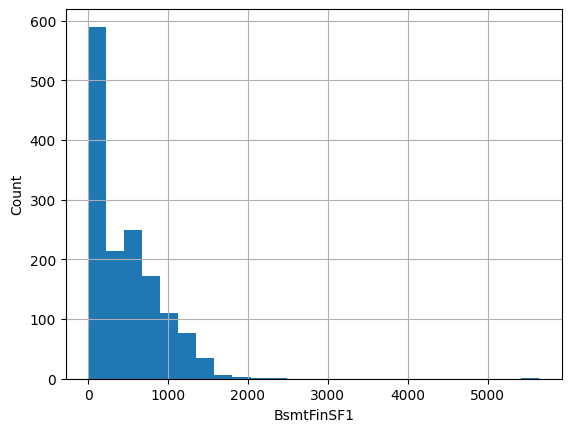

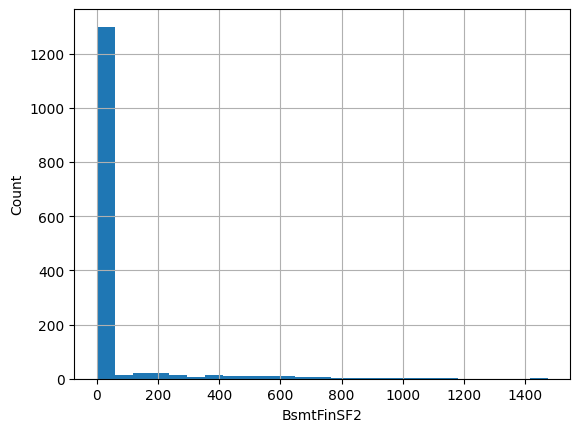

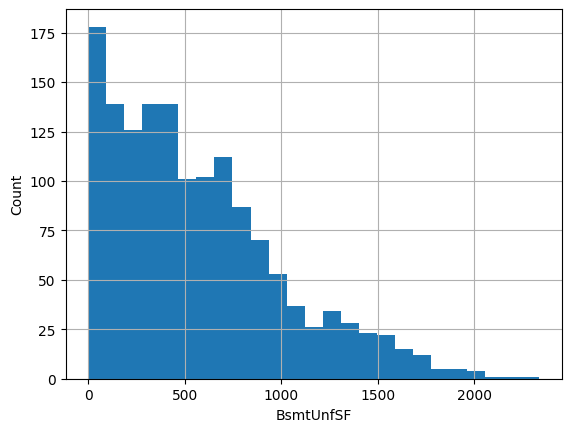

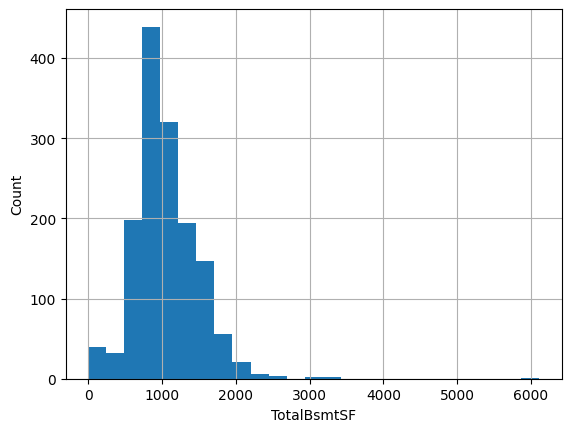

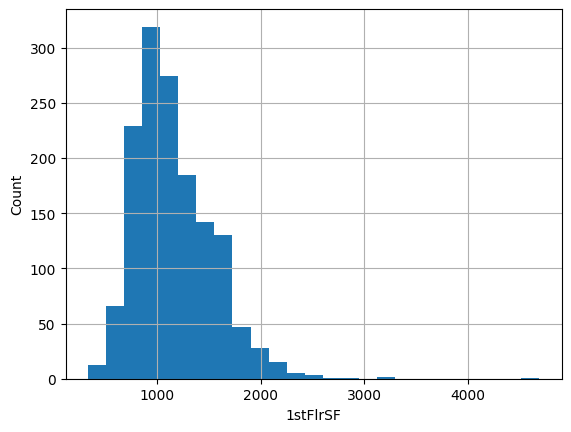

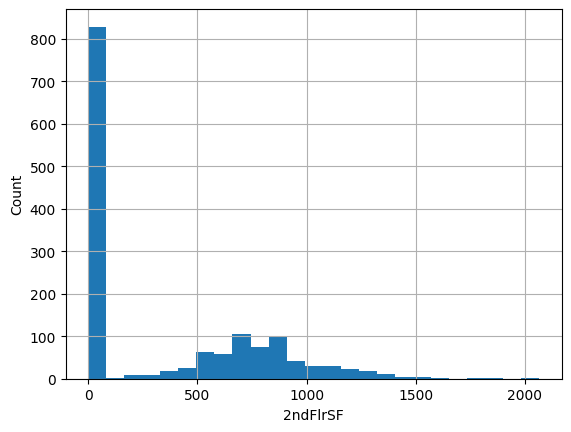

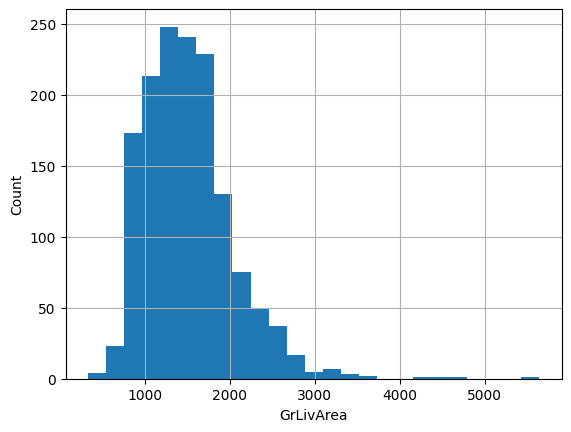

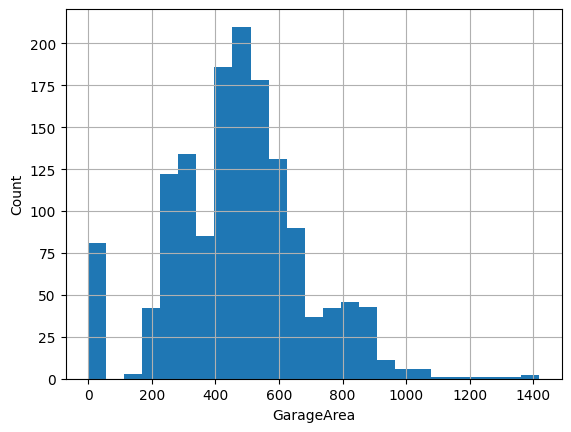

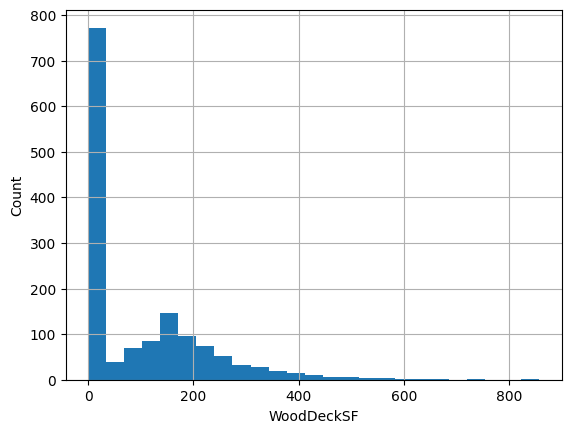

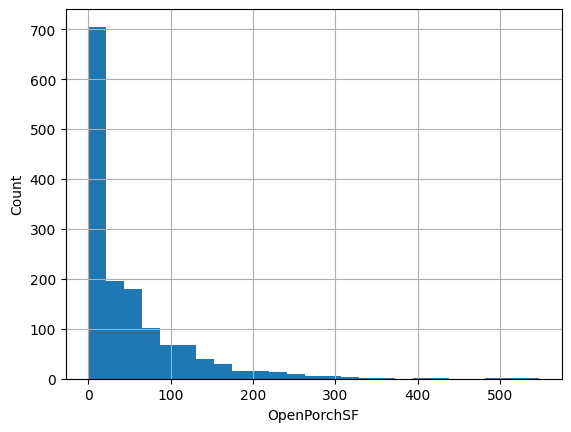

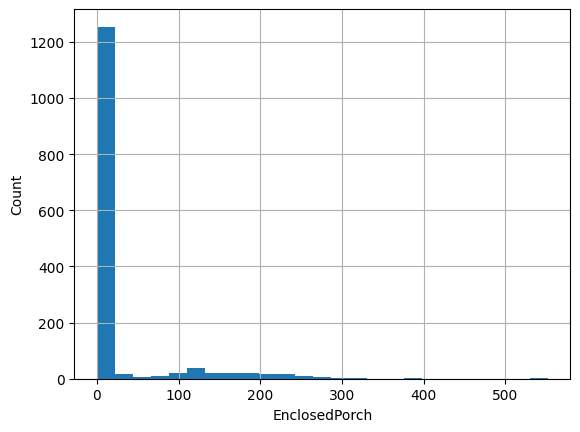

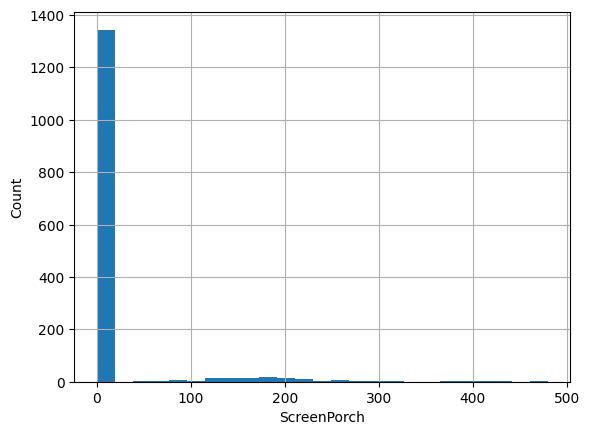

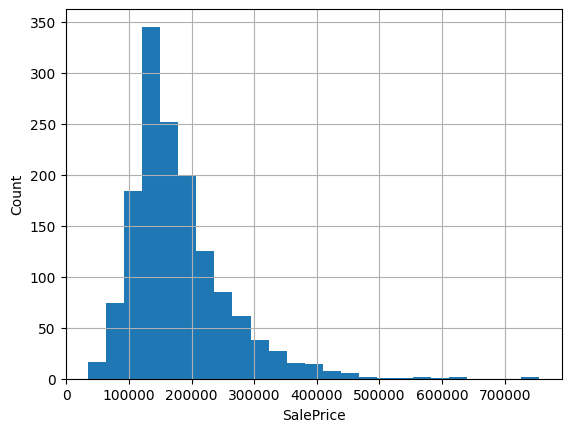

In [ ]:
for feature in continuous_feature:
    data = dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()


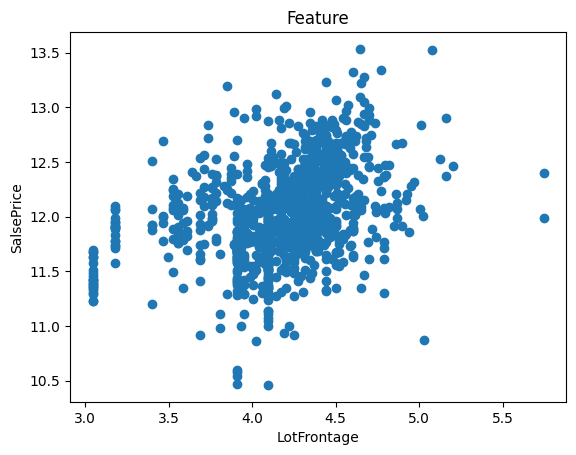

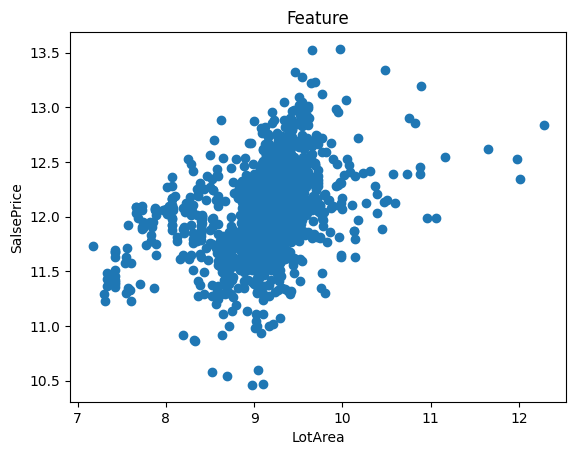

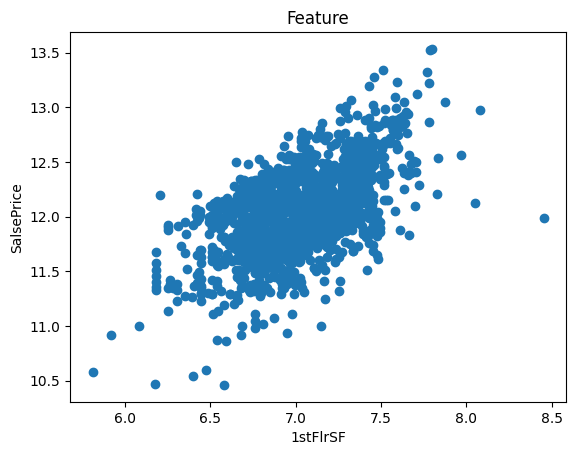

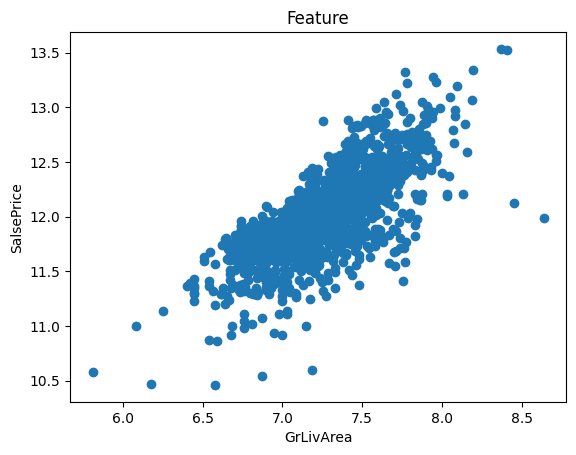

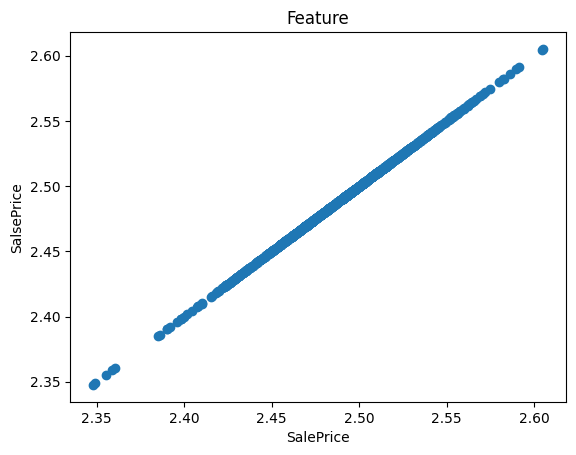

In [ ]:

for feature in continuous_feature:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass 
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalsePrice')
        plt.title('Feature')
        plt.show()
    


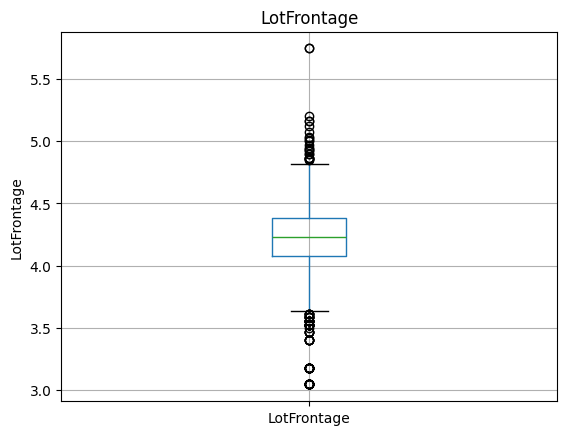

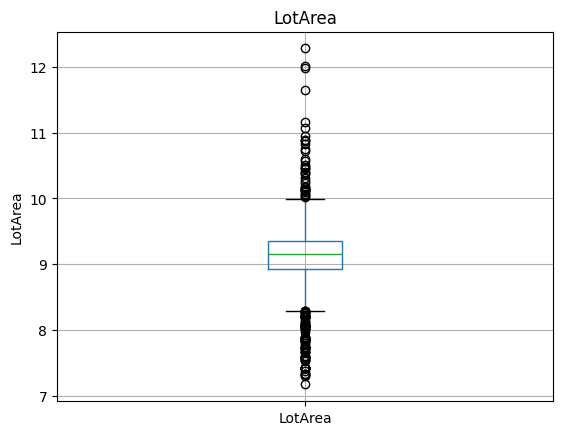

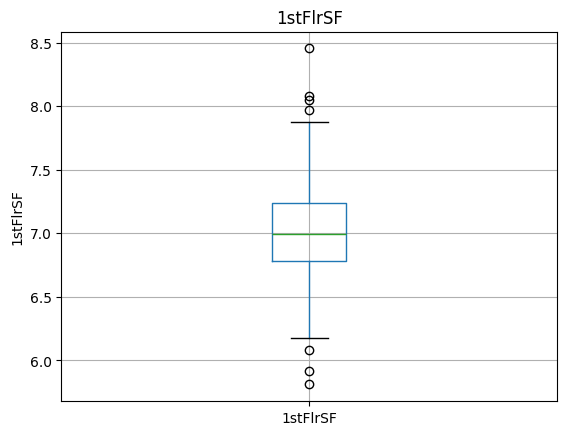

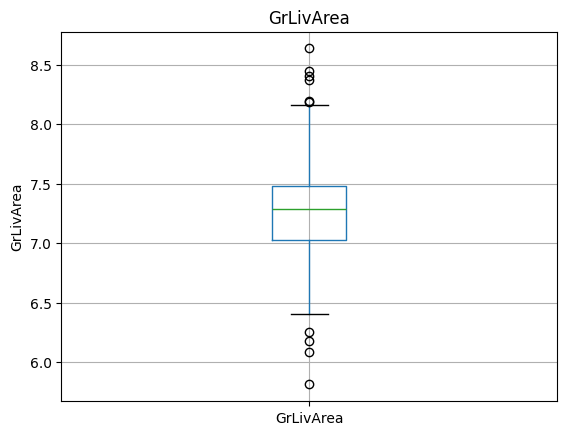

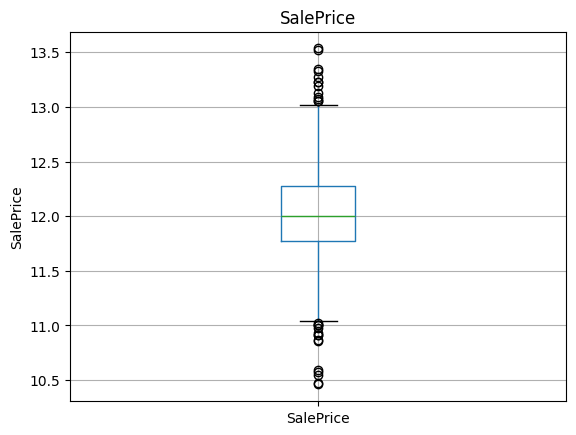

In [ ]:
### Ourliers


for feature in continuous_feature:
    data = dataset.copy()
    if 0  in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        # plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
                                                                


In [ ]:
catoegorical_features = [feature for feature in dataset.columns if data[feature].dtypes =='O']
catoegorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
dataset[catoegorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
for feature in catoegorical_features:
    print('The feature is {} and number of cat are {}' .format(feature, len(dataset[feature].unique())))

The feature is MSZoning and number of cat are 5
The feature is Street and number of cat are 2
The feature is Alley and number of cat are 3
The feature is LotShape and number of cat are 4
The feature is LandContour and number of cat are 4
The feature is Utilities and number of cat are 2
The feature is LotConfig and number of cat are 5
The feature is LandSlope and number of cat are 3
The feature is Neighborhood and number of cat are 25
The feature is Condition1 and number of cat are 9
The feature is Condition2 and number of cat are 8
The feature is BldgType and number of cat are 5
The feature is HouseStyle and number of cat are 8
The feature is RoofStyle and number of cat are 6
The feature is RoofMatl and number of cat are 8
The feature is Exterior1st and number of cat are 15
The feature is Exterior2nd and number of cat are 16
The feature is MasVnrType and number of cat are 4
The feature is ExterQual and number of cat are 4
The feature is ExterCond and number of cat are 5
The feature is 

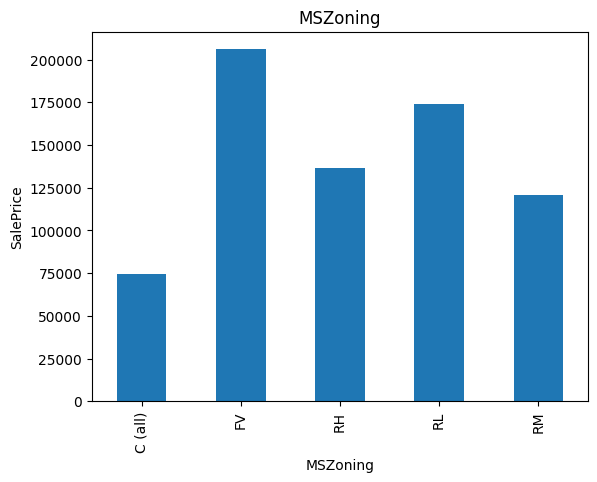

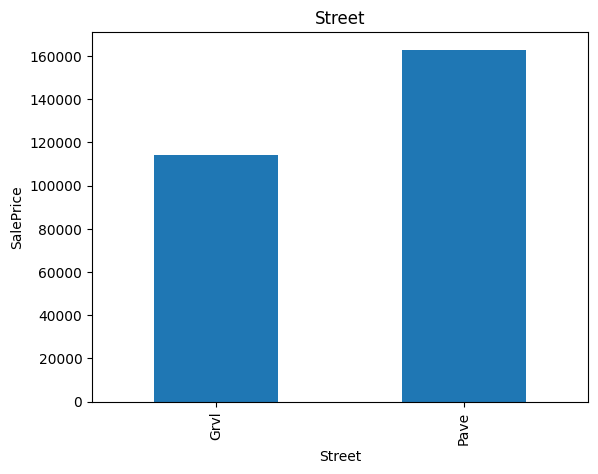

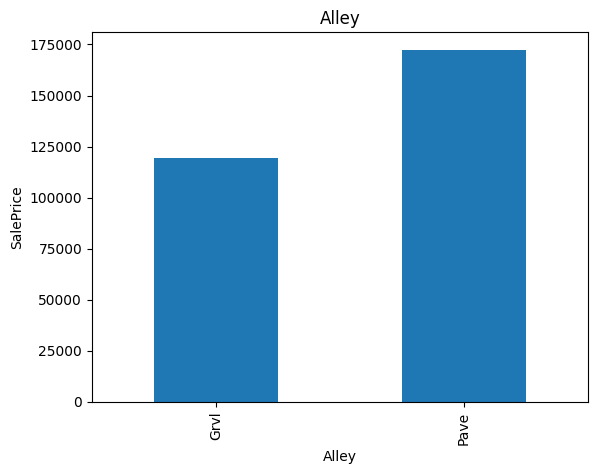

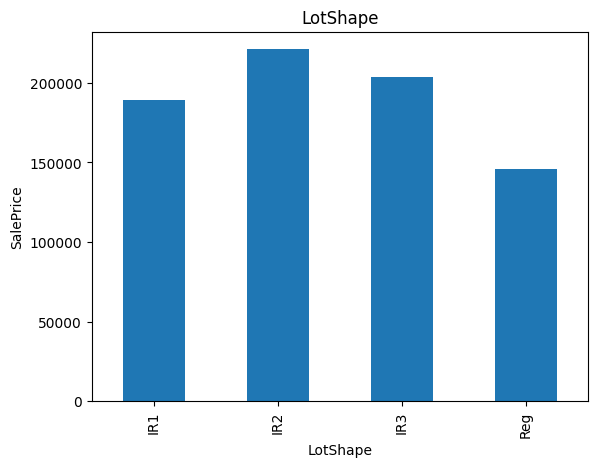

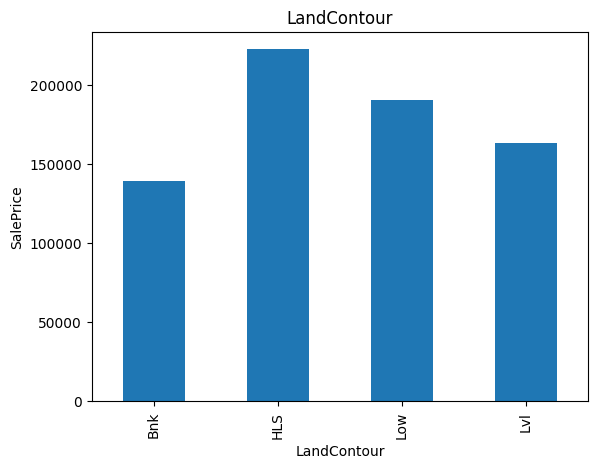

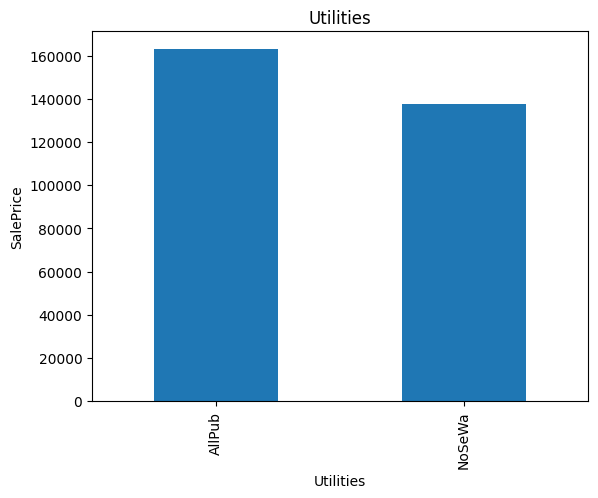

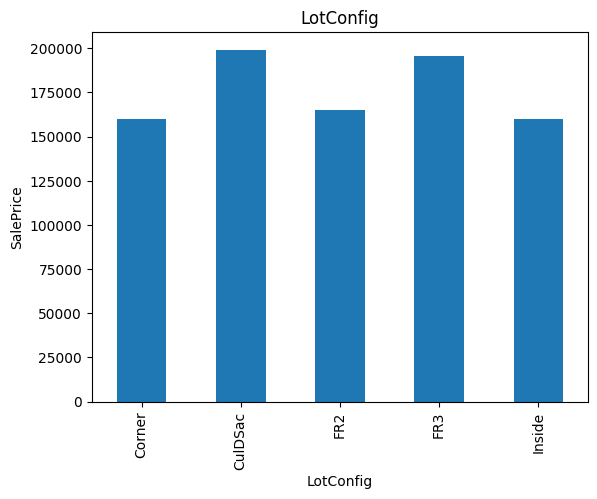

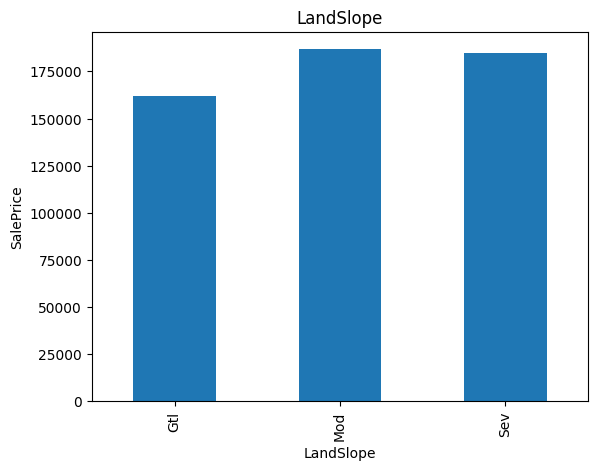

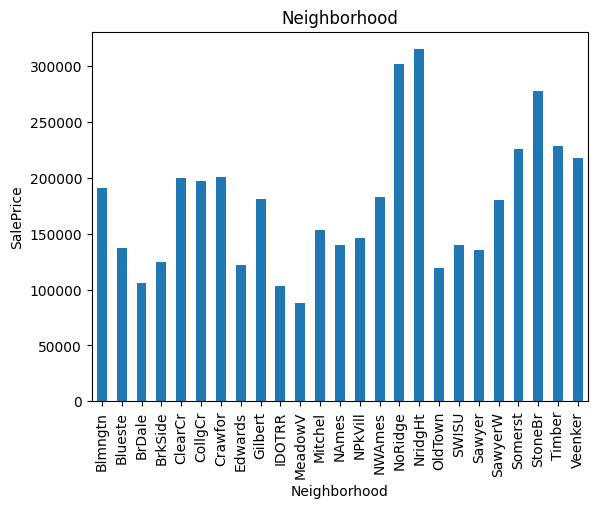

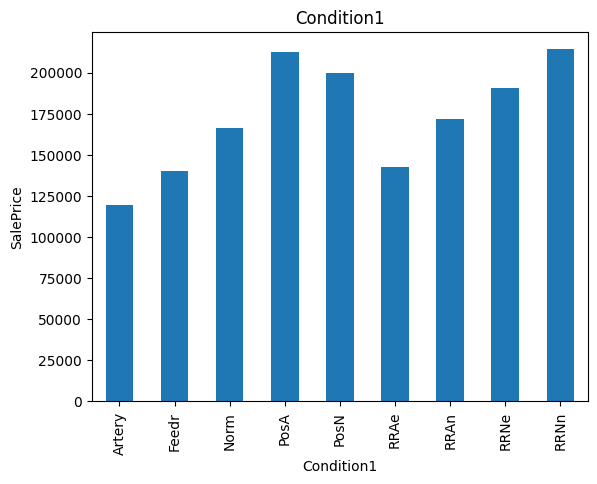

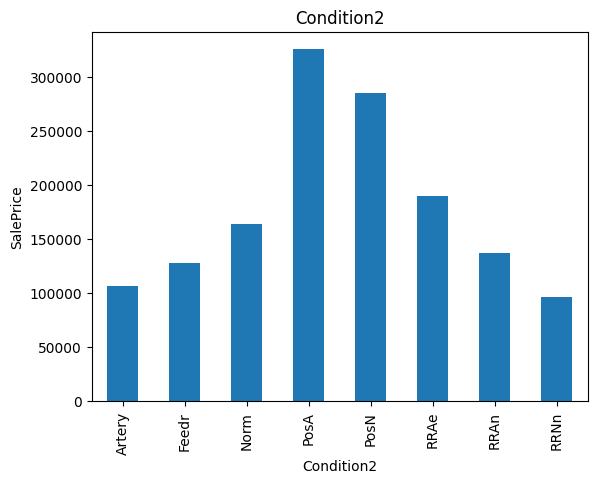

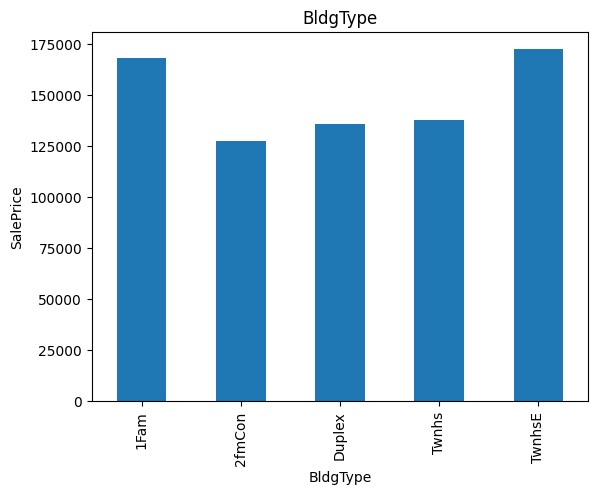

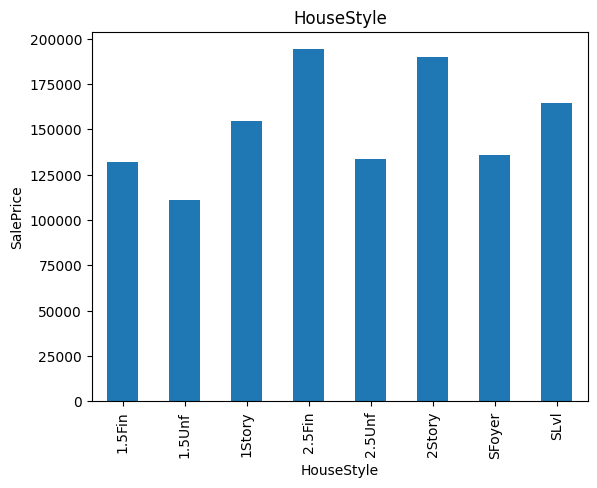

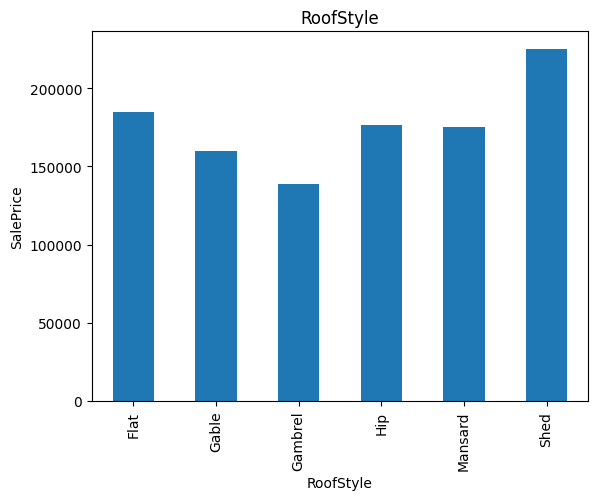

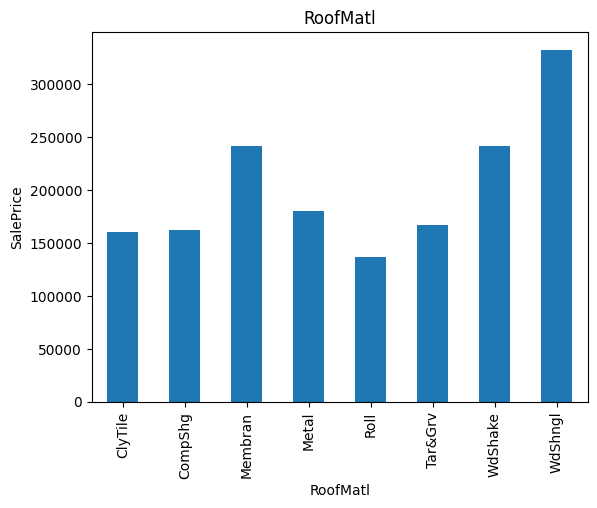

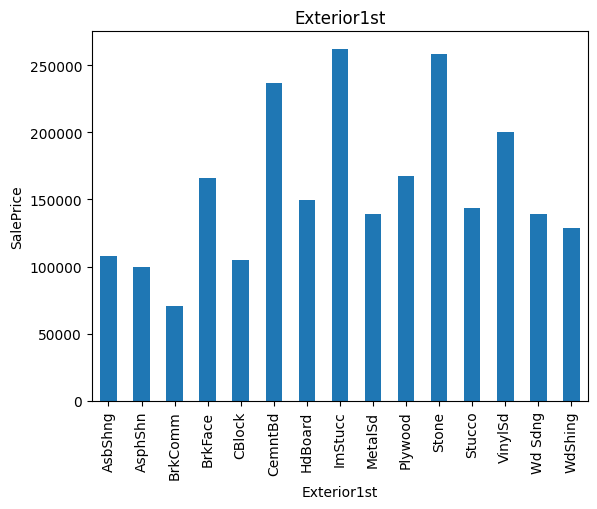

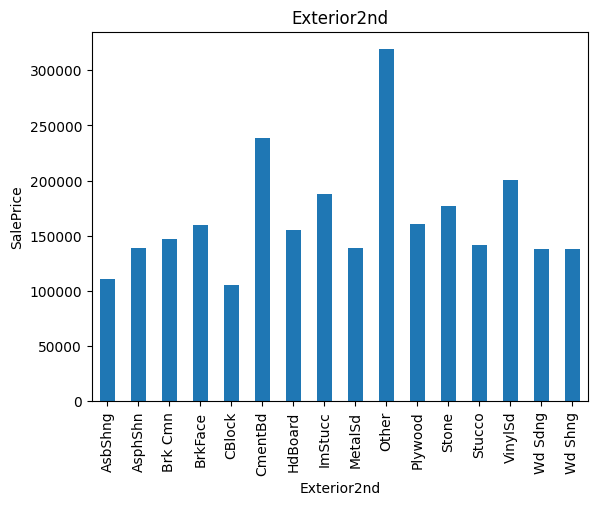

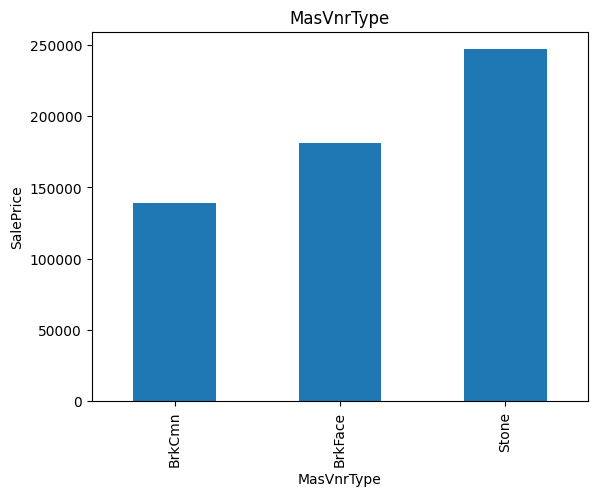

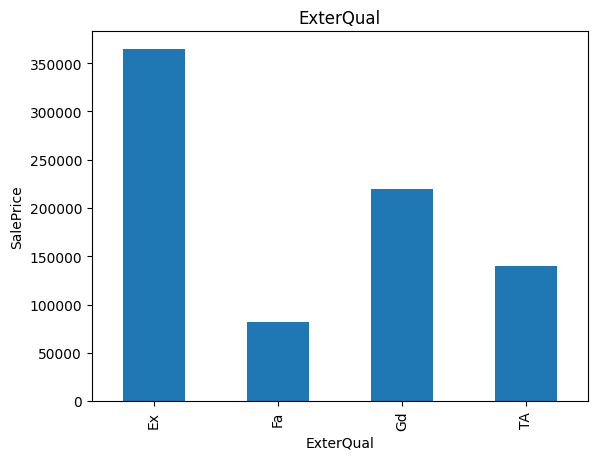

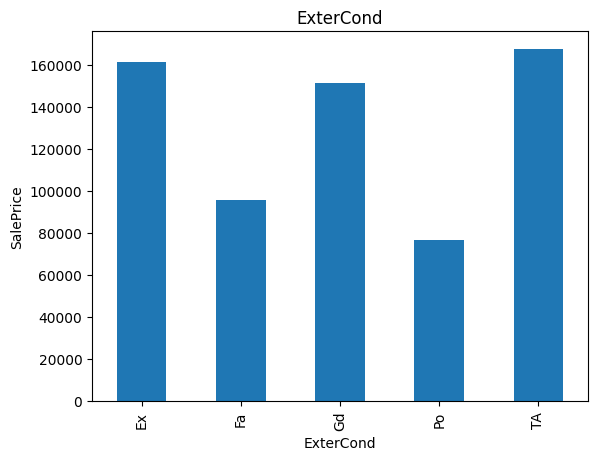

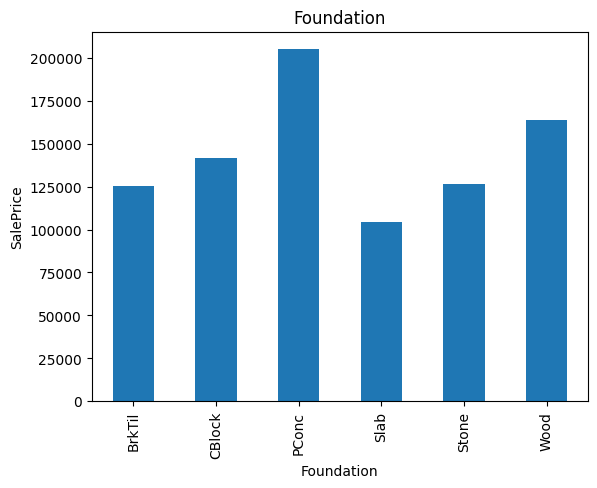

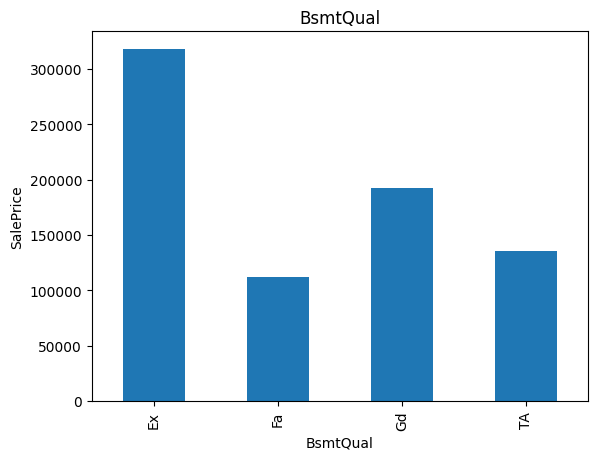

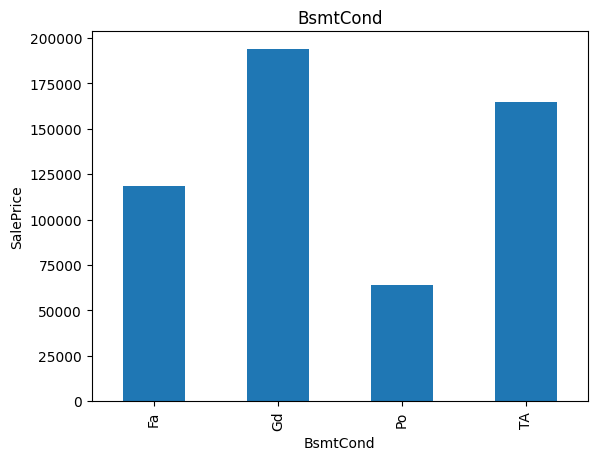

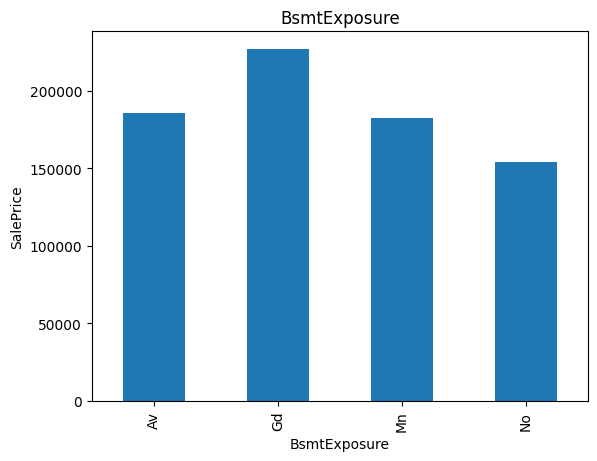

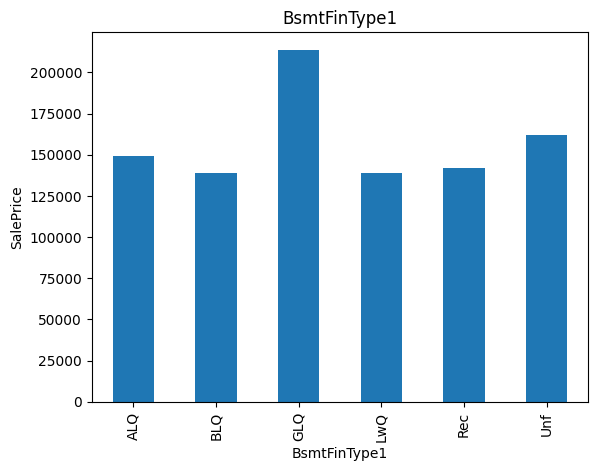

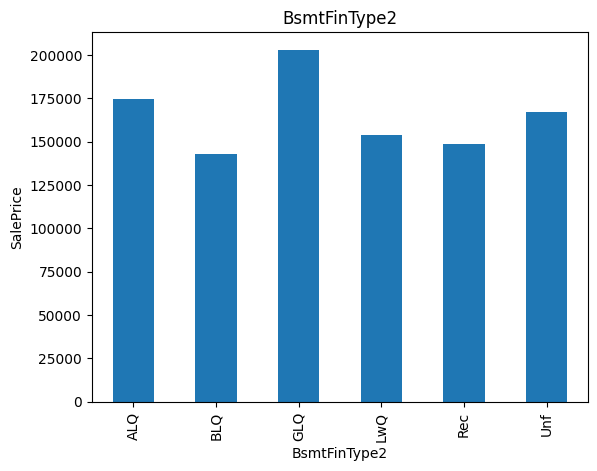

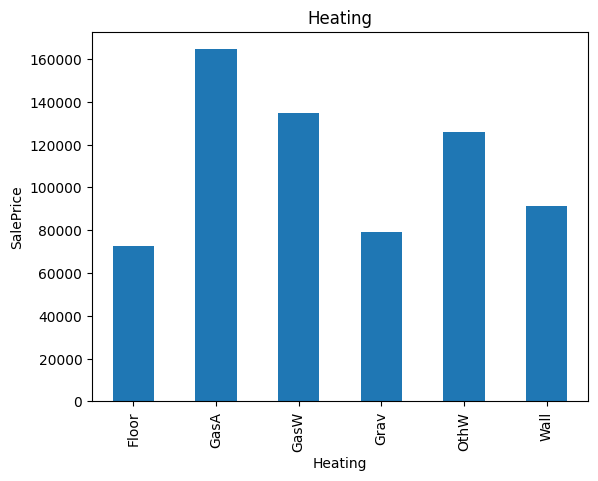

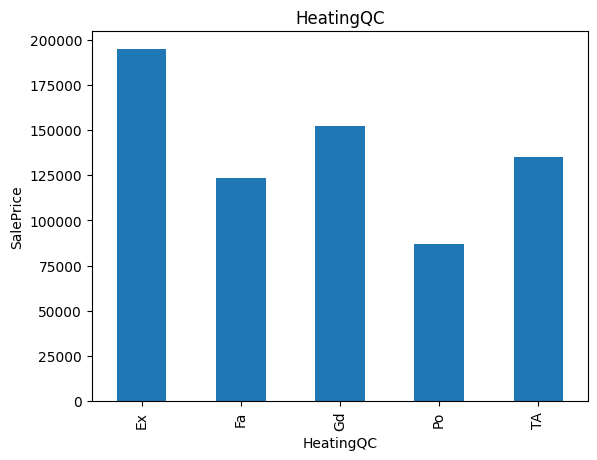

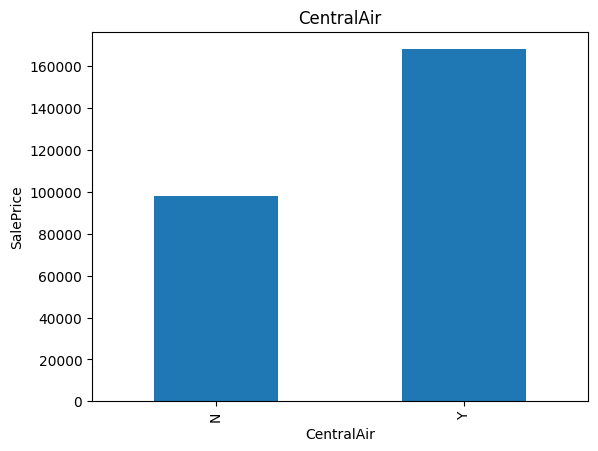

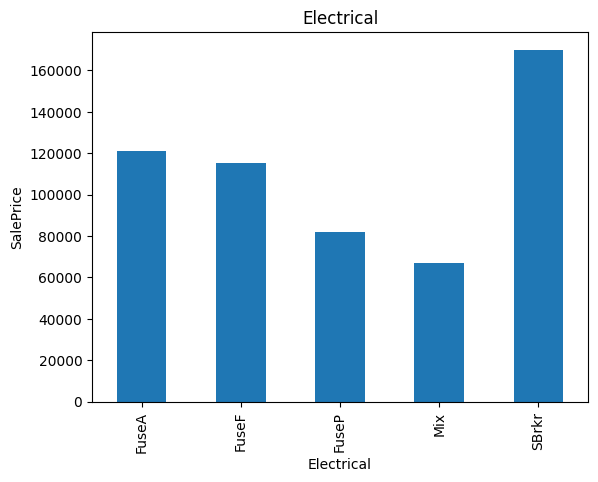

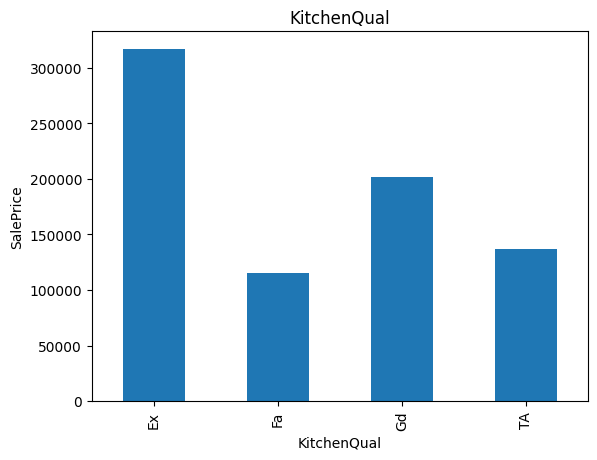

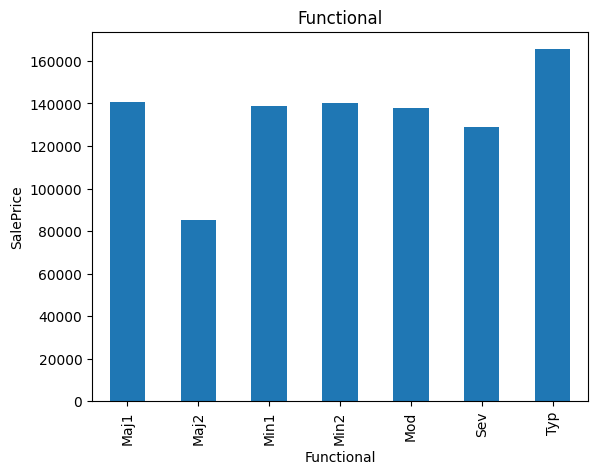

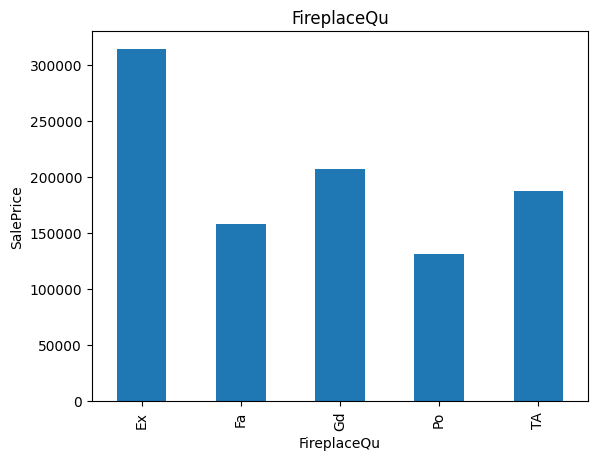

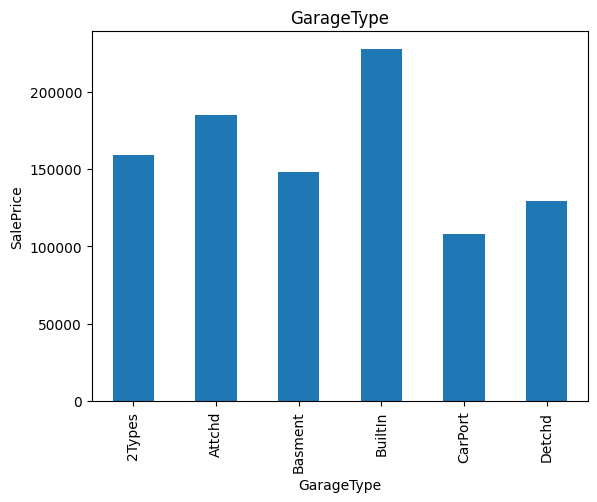

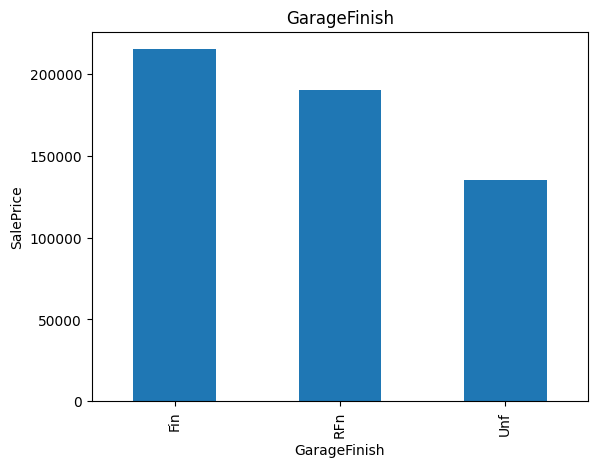

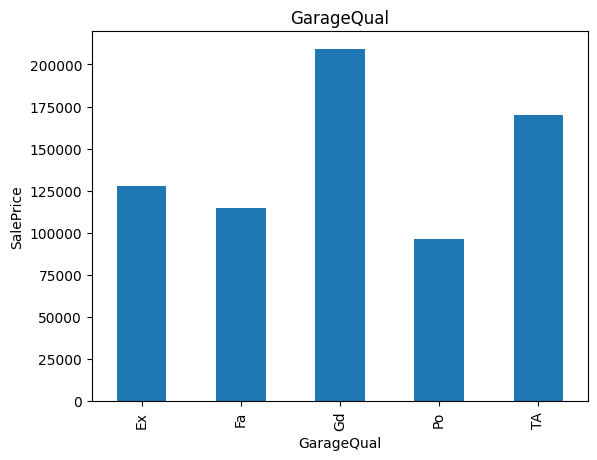

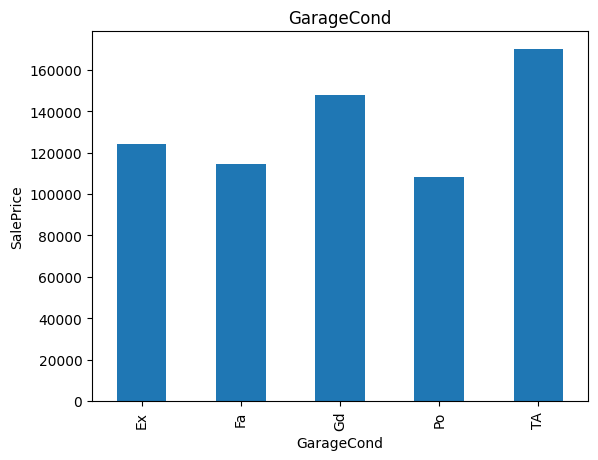

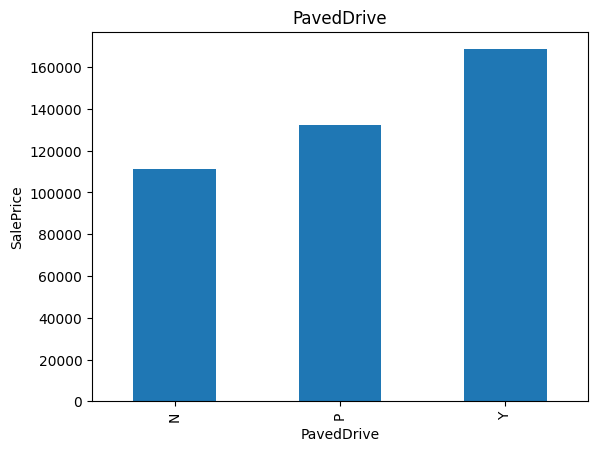

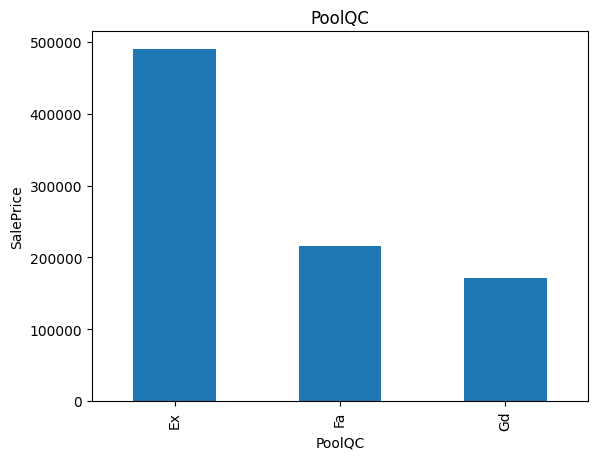

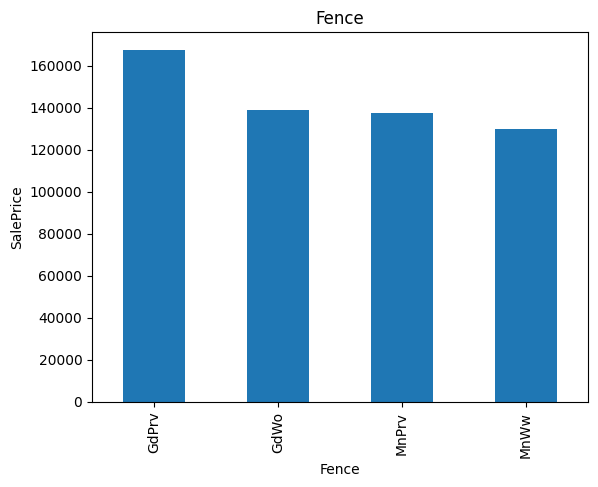

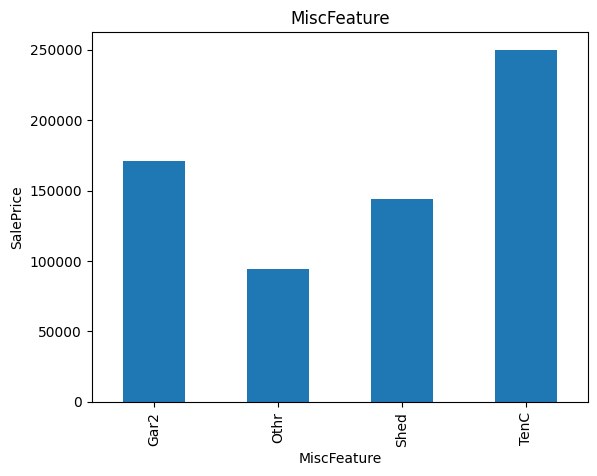

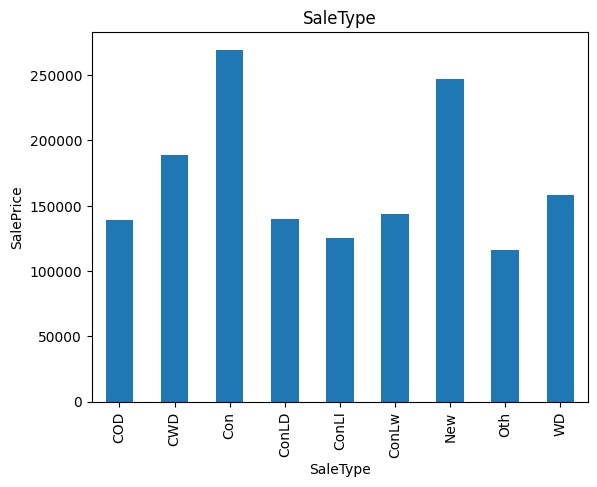

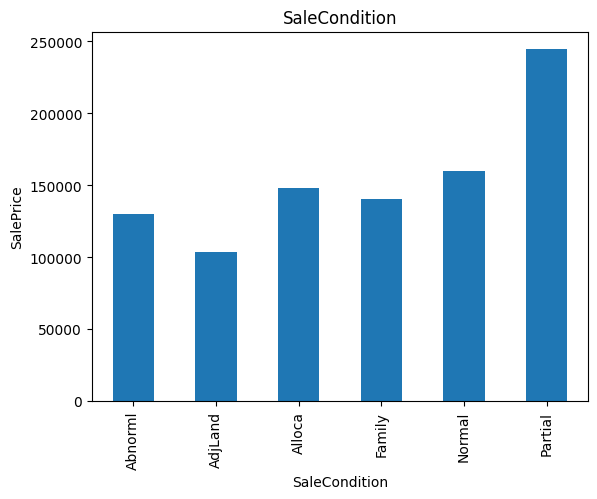

In [ ]:
for feature in catoegorical_features:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
